# Elaboración de algoritmo de IA para predecir la relación entre hábitos alimenticios y obesidad mórbida
----
----
**Attributes related with eating habits are:**
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- Consumption of alcohol (CALC).

**Attributes related with the physical condition are:**
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

**Other variables were:**
- Gender
- Age
- Height and Weight.

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity.

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.https://www.sciencedirect.com/science/article/pii/S2352340919306985

----
# **Carga de librerías**

- Carga de librerías a usar en el notebook.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold,cross_validate

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from xgboost import to_graphviz
from sklearn.tree import plot_tree
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

----
# **Carga de Información**

In [40]:
df_dirty = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv', engine='python')

display(df_dirty.head())

display(df_dirty.describe())
display(df_dirty.info())

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

None

In [41]:
display(df_dirty.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

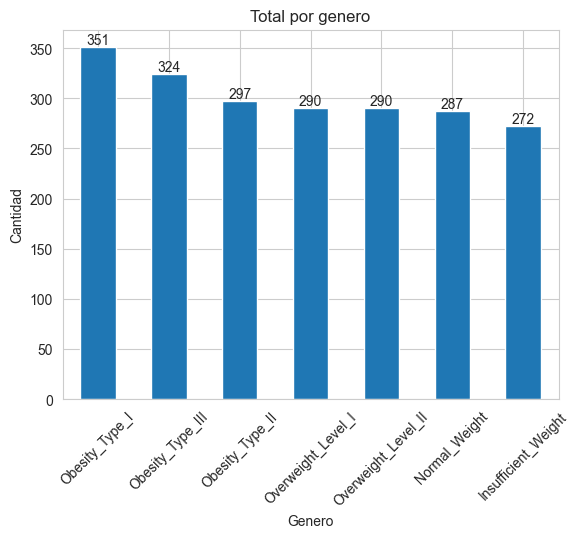

In [42]:
counts = df_dirty.value_counts("NObeyesdad")
ax = counts.plot(kind='bar')
# Añadir el valor total en la parte superior de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.title('Total por genero')

plt.xticks(rotation=45)
plt.show()


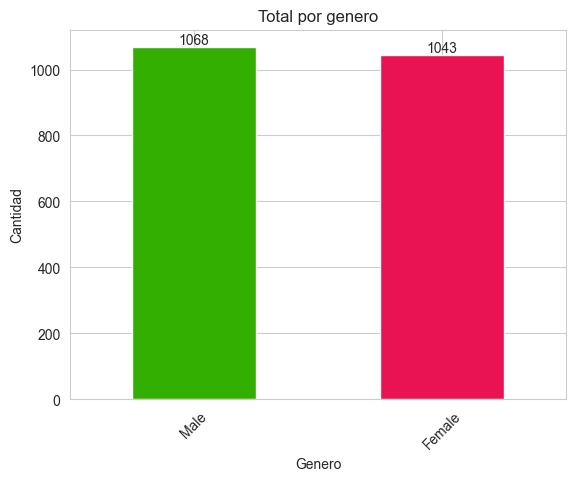

In [43]:
counts = df_dirty.value_counts("Gender")

ax = counts.plot(kind='bar',color=['#32AF00', '#E91354'])
# Añadir el valor total en la parte superior de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.title('Total por genero')

plt.xticks(rotation=45)
plt.show()

In [44]:
counts = df_dirty.value_counts("Age")

display(counts.head(10))
# .plot(kind='bar',figsize=(12,5))
# # Añadir el valor total en la parte superior de cada barra
# # for i in ax.patches:
# #     ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

# # Añadir etiquetas y título
# plt.xlabel('Genero')
# plt.ylabel('Cantidad')
# plt.title('Total por genero')

# plt.xticks(rotation=80)
# plt.show()

Age
18.0    128
26.0    101
21.0     96
23.0     89
19.0     59
20.0     48
22.0     39
17.0     30
24.0     18
25.0     16
dtype: int64



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



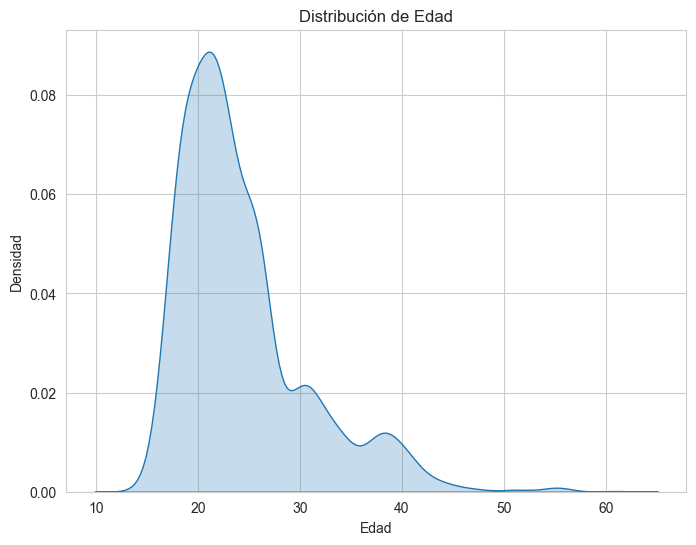

In [45]:
# Gráfica de densidad
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_dirty['Age'], shade=True)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de Edad')
plt.show()

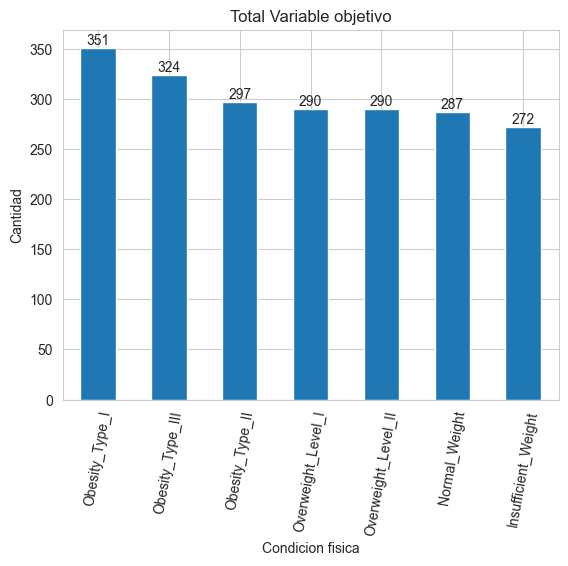

In [46]:
counts = df_dirty.value_counts("NObeyesdad")

ax = counts.plot(kind='bar')
# Añadir el valor total en la parte superior de cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Condicion fisica')
plt.ylabel('Cantidad')
plt.title('Total Variable objetivo')

plt.xticks(rotation=80)
plt.show()

In [47]:
for i in df_dirty.select_dtypes(exclude = ['object']).columns:
    if i == 'Height':
        df_dirty[i] = df_dirty[i].round(2)
    elif  i =='Weight':
        df_dirty[i] = df_dirty[i].round(1)
    else:
        df_dirty[i] = df_dirty[i].round(0)

In [48]:
for i in df_dirty.columns:
    print(i)
    print("----------")
    print(set(df_dirty[i].tolist()))
    print("-------------")

Gender
----------
{'Female', 'Male'}
-------------
Age
----------
{14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 61.0}
-------------
Height
----------
{1.62, 1.78, 1.8, 1.52, 1.5, 1.64, 1.72, 1.85, 1.65, 1.77, 1.75, 1.58, 1.67, 1.83, 1.92, 1.93, 1.68, 1.76, 1.84, 1.59, 1.51, 1.69, 1.6, 1.94, 1.7, 1.53, 1.61, 1.86, 1.45, 1.95, 1.71, 1.79, 1.63, 1.88, 1.87, 1.54, 1.46, 1.55, 1.89, 1.56, 1.81, 1.73, 1.48, 1.9, 1.98, 1.66, 1.82, 1.57, 1.74, 1.91, 1.49}
-------------
Weight
----------
{131.4, 39.0, 40.0, 41.3, 42.0, 42.3, 44.0, 45.0, 44.8, 47.0, 48.0, 49.0, 50.4, 50.0, 51.0, 52.0, 53.0, 54.5, 55.3, 55.0, 56.0, 57.0, 59.0, 59.8, 58.0, 58.5, 60.0, 64.4, 61.0, 67.8, 66.5, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 71.0, 74.0, 75.0, 76.0, 81.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 8

In [49]:
def decode_question(acronym):
    diccionario_siglas = {'FAVC':"Frequent consumption of high caloric food",
                          'FCVC':"Frequency of consumption of vegetables",
                          'NCP':"Number of main meals",
                          'CAEC':"Consumption of food between meals",
                          'CH2O':"Consumption of water daily",
                          'CALC':"Consumption of alcohol",
                          'SCC':"Calories consumption monitoring",
                          'FAF':"Physical activity frequency",
                          'TUE':"Time using technology devices",
                          'MTRANS':"Transportation used",
                          'NObeyesdad':'Condicion',
                          'Gender':'Gender',
                          'family_history_with_overweight': 'family history with overweight',
                          'SMOKE': 'Smoke'}
    return diccionario_siglas[acronym]

In [50]:
def decode_answer(acronym, answer):
    diccionario_respuestas = {'FAVC': ['Yes','No'],
                          'FCVC':['Never','Sometimes','Always'],
                          'NCP':['Between 1 y 2','Three','More than three'],
                          'CAEC':['No','Sometimes','Frequently', 'Always'],
                          'CH2O':['Less than a liter','Between 1 and 2 L', 'More than 2 L'],
                          'CALC':['I do not drink','Sometimes','Frequently', 'Always'],
                          'SCC':['Yes','No'],
                          'FAF':['I do not have','1 or 2 days', '2 or 4 days', '4 or 5 days'],
                          'TUE':['0 - 2 hours','3 - 5 hours','More than 5 hours'],
                          'MTRANS':['Automobile','Motorbike','Bike','Public Transportation','Walking'],
                          'Gender':['Female','Male']}
    return diccionario_respuestas[acronym][answer]
# print(decode_answer('MTRANS'))

In [51]:
df_dirty

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female  21.0    1.62    64.0                            yes   no   2.0   
1     Female  21.0    1.52    56.0                            yes   no   3.0   
2       Male  23.0    1.80    77.0                            yes   no   2.0   
3       Male  27.0    1.80    87.0                             no   no   3.0   
4       Male  22.0    1.78    89.8                             no   no   2.0   
...      ...   ...     ...     ...                            ...  ...   ...   
2106  Female  21.0    1.71   131.4                            yes  yes   3.0   
2107  Female  22.0    1.75   133.7                            yes  yes   3.0   
2108  Female  23.0    1.75   133.7                            yes  yes   3.0   
2109  Female  24.0    1.74   133.3                            yes  yes   3.0   
2110  Female  24.0    1.74   133.5                            yes  yes   3.0   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0     3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1     3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2     3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3     3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4     1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
...   ...        ...   ...   ...  ...  ...  ...         ...   
2106  3.0  Sometimes    no   2.0   no  2.0  1.0   Sometimes   
2107  3.0  Sometimes    no   2.0   no  1.0  1.0   Sometimes   
2108  3.0  Sometimes    no   2.0   no  1.0  1.0   Sometimes   
2109  3.0  Sometimes    no   3.0   no  1.0  1.0   Sometimes   
2110  3.0  Sometimes    no   3.0   no  1.0  1.0   Sometimes   

                     MTRANS           NObeyesdad  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

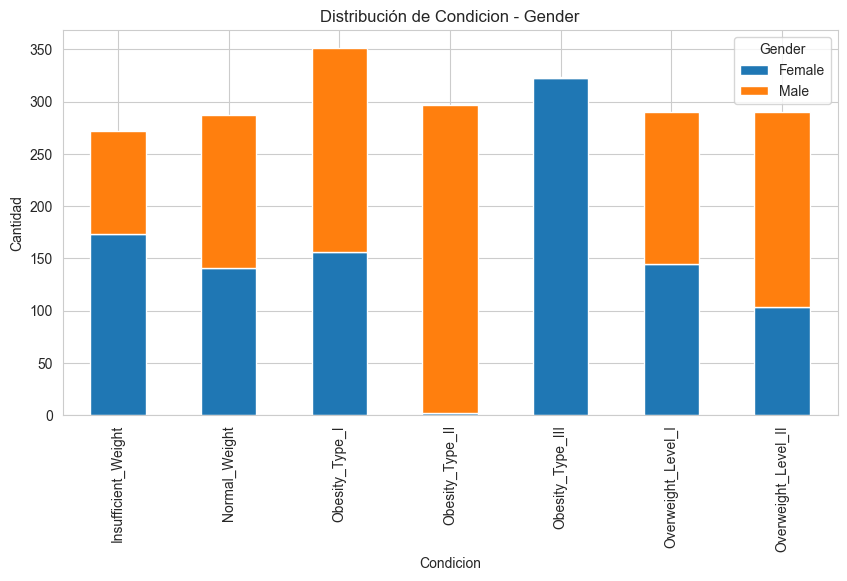

In [52]:
def plot_obesidad(items):
    df_obeyesedad = df_dirty.groupby(items).size().unstack(fill_value=0)
    display(df_obeyesedad)
    ax = df_obeyesedad.plot(kind='bar', stacked=True, figsize=(10,5), grid=True)

    plt.title(f'Distribución de {decode_question(items[0])} - {decode_question(items[1])}')
    plt.xlabel('Condicion')
    plt.ylabel('Cantidad')
    plt.show()

plot_obesidad(['NObeyesdad', 'Gender'])

MTRANS               Automobile  Bike  Motorbike  Public_Transportation  \
NObeyesdad                                                                
Insufficient_Weight          46     0          0                    220   
Normal_Weight                45     4          6                    200   
Obesity_Type_I              110     0          3                    236   
Obesity_Type_II              95     1          0                    200   
Obesity_Type_III              1     0          0                    323   
Overweight_Level_I           66     2          1                    212   
Overweight_Level_II          94     0          1                    189   

MTRANS               Walking  
NObeyesdad                    
Insufficient_Weight        6  
Normal_Weight             32  
Obesity_Type_I             2  
Obesity_Type_II            1  
Obesity_Type_III           0  
Overweight_Level_I         9  
Overweight_Level_II        6

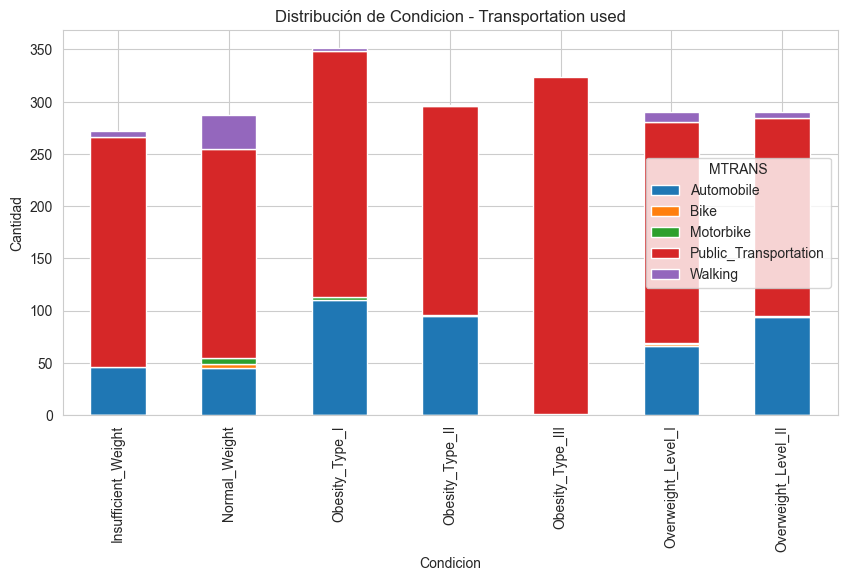

In [53]:
plot_obesidad(['NObeyesdad', 'MTRANS'])


FAF                  0.0  1.0  2.0  3.0
NObeyesdad                             
Insufficient_Weight   72   72  117   11
Normal_Weight         80   97   69   41
Obesity_Type_I       131  123   72   25
Obesity_Type_II       69  165   63    0
Obesity_Type_III     187   68   69    0
Overweight_Level_I    84  126   56   24
Overweight_Level_II   97  125   50   18

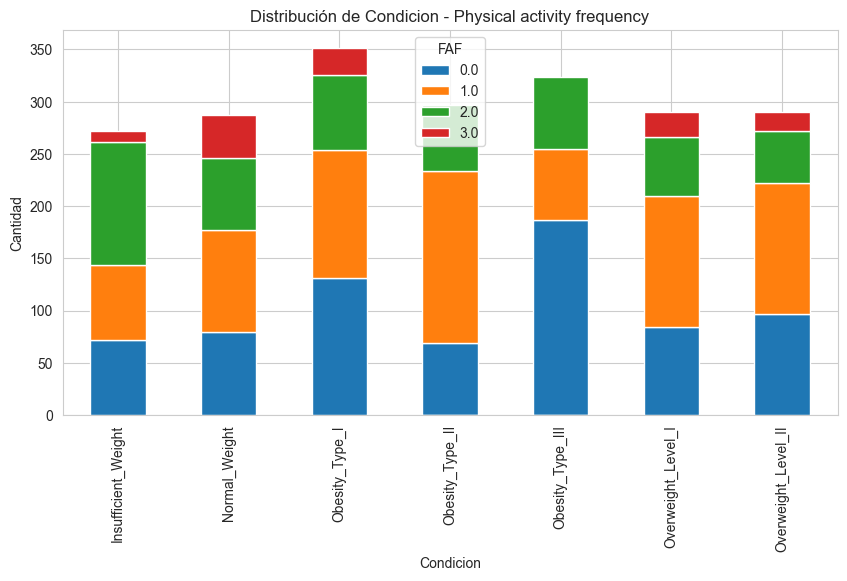

In [54]:
plot_obesidad(['NObeyesdad', 'FAF'])

FCVC                 1.0  2.0  3.0
NObeyesdad                        
Insufficient_Weight   23   86  163
Normal_Weight         18  155  114
Obesity_Type_I        17  256   78
Obesity_Type_II       21  138  138
Obesity_Type_III       0    0  324
Overweight_Level_I    14  186   90
Overweight_Level_II    9  192   89

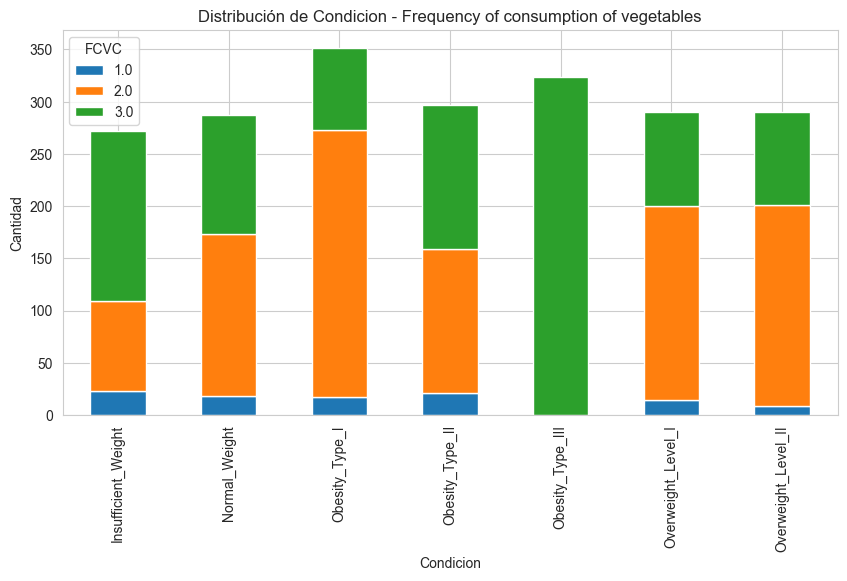

In [55]:
plot_obesidad(['NObeyesdad', 'FCVC'])

TUE                  0.0  1.0  2.0
NObeyesdad                        
Insufficient_Weight   94  127   51
Normal_Weight        129  122   36
Obesity_Type_I       169  121   61
Obesity_Type_II      173  103   21
Obesity_Type_III     109  215    0
Overweight_Level_I   164   82   44
Overweight_Level_II  114  145   31

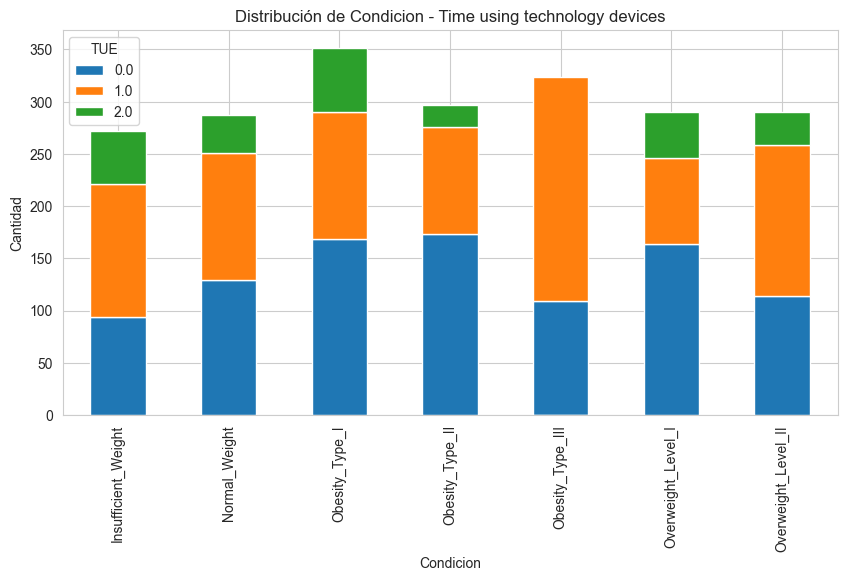

In [56]:
plot_obesidad(['NObeyesdad', 'TUE'])

CH2O                 1.0  2.0  3.0
NObeyesdad                        
Insufficient_Weight   84  142   46
Normal_Weight         83  164   40
Obesity_Type_I        68  173  110
Obesity_Type_II       82  177   38
Obesity_Type_III      61  114  149
Overweight_Level_I    60  154   76
Overweight_Level_II   47  186   57

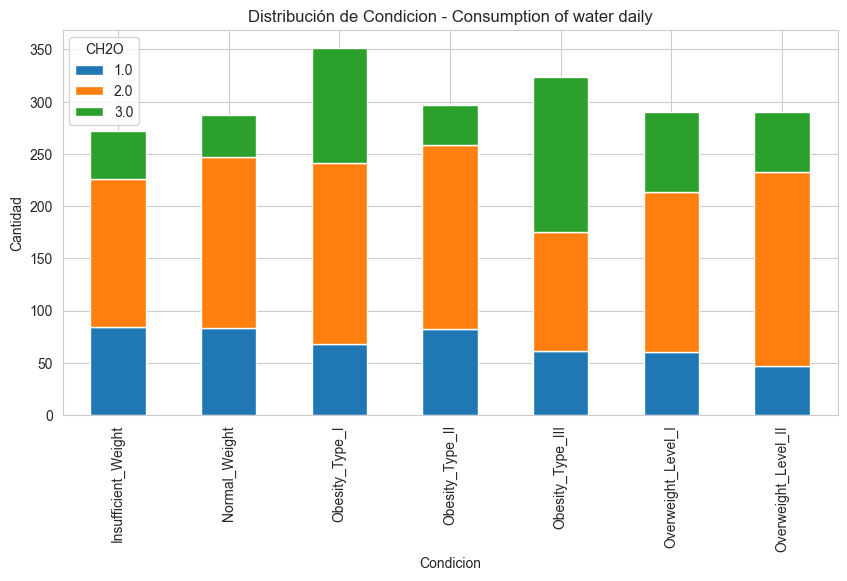

In [57]:
plot_obesidad(['NObeyesdad', 'CH2O'])

FAVC                 no  yes
NObeyesdad                  
Insufficient_Weight  51  221
Normal_Weight        79  208
Obesity_Type_I       11  340
Obesity_Type_II       7  290
Obesity_Type_III      1  323
Overweight_Level_I   22  268
Overweight_Level_II  74  216

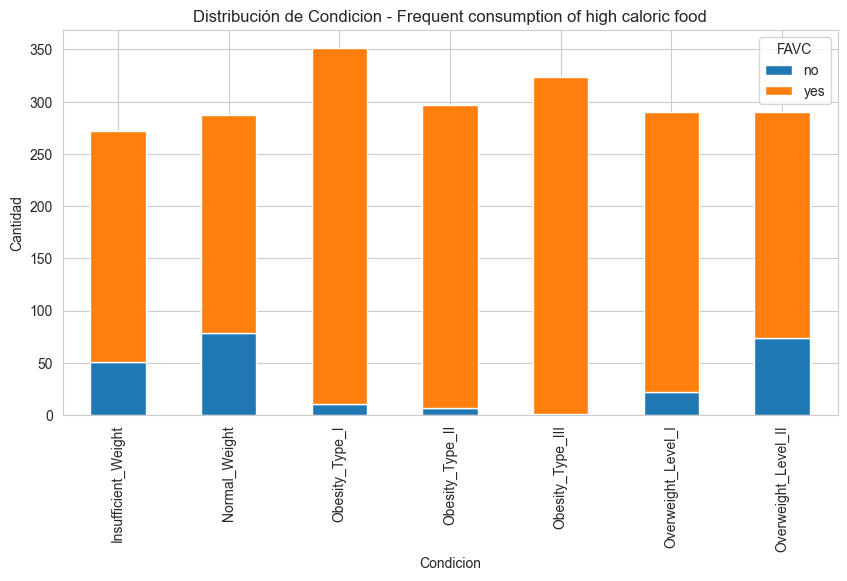

In [58]:
plot_obesidad(['NObeyesdad', 'FAVC'])

TUE                  0.0  1.0  2.0
NObeyesdad                        
Insufficient_Weight   94  127   51
Normal_Weight        129  122   36
Obesity_Type_I       169  121   61
Obesity_Type_II      173  103   21
Obesity_Type_III     109  215    0
Overweight_Level_I   164   82   44
Overweight_Level_II  114  145   31

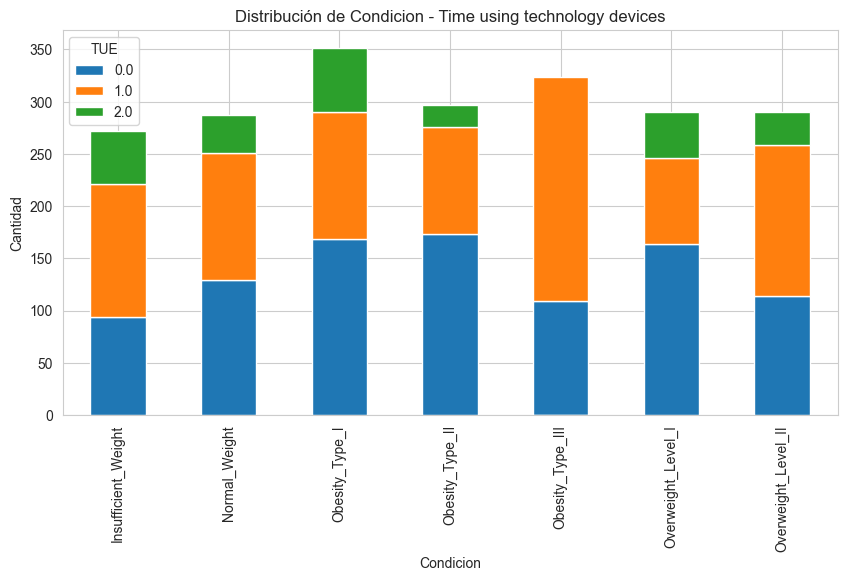

In [59]:
plot_obesidad(['NObeyesdad', 'TUE'])

CAEC                 Always  Frequently  Sometimes  no
NObeyesdad                                            
Insufficient_Weight       2         121        146   3
Normal_Weight            35          83        159  10
Obesity_Type_I            6           6        338   1
Obesity_Type_II           2           1        293   1
Obesity_Type_III          0           1        323   0
Overweight_Level_I        5          14        236  35
Overweight_Level_II       3          16        270   1

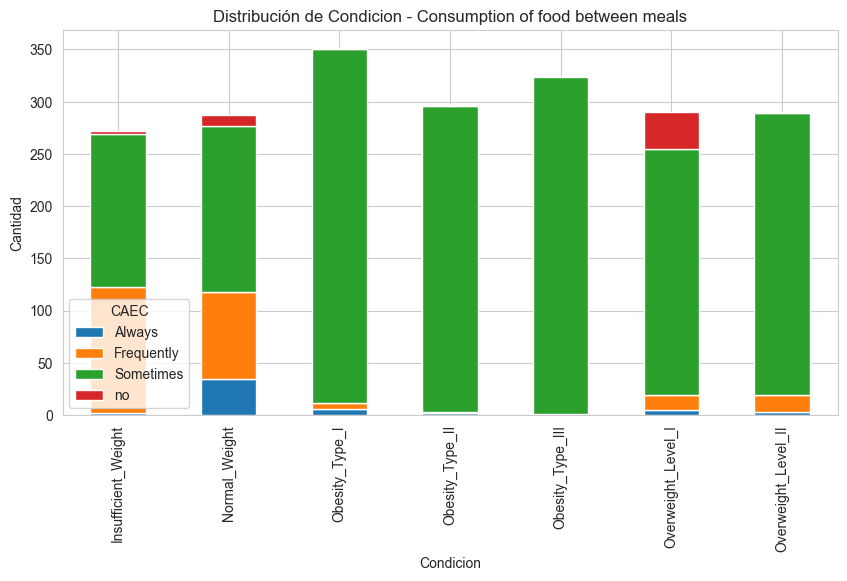

In [60]:
plot_obesidad(['NObeyesdad', 'CAEC'])

CH2O                 1.0  2.0  3.0
NObeyesdad                        
Insufficient_Weight   84  142   46
Normal_Weight         83  164   40
Obesity_Type_I        68  173  110
Obesity_Type_II       82  177   38
Obesity_Type_III      61  114  149
Overweight_Level_I    60  154   76
Overweight_Level_II   47  186   57

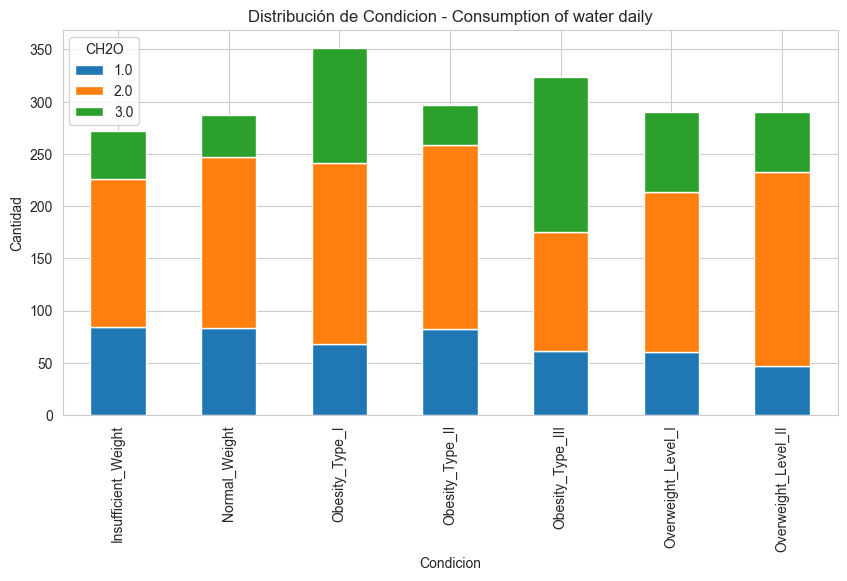

In [61]:
plot_obesidad(['NObeyesdad', 'CH2O'])

CALC                 Always  Frequently  Sometimes   no
NObeyesdad                                             
Insufficient_Weight       0           1        154  117
Normal_Weight             1          18        161  107
Obesity_Type_I            0          14        172  165
Obesity_Type_II           0           2        224   71
Obesity_Type_III          0           0        323    1
Overweight_Level_I        0          16        224   50
Overweight_Level_II       0          19        143  128

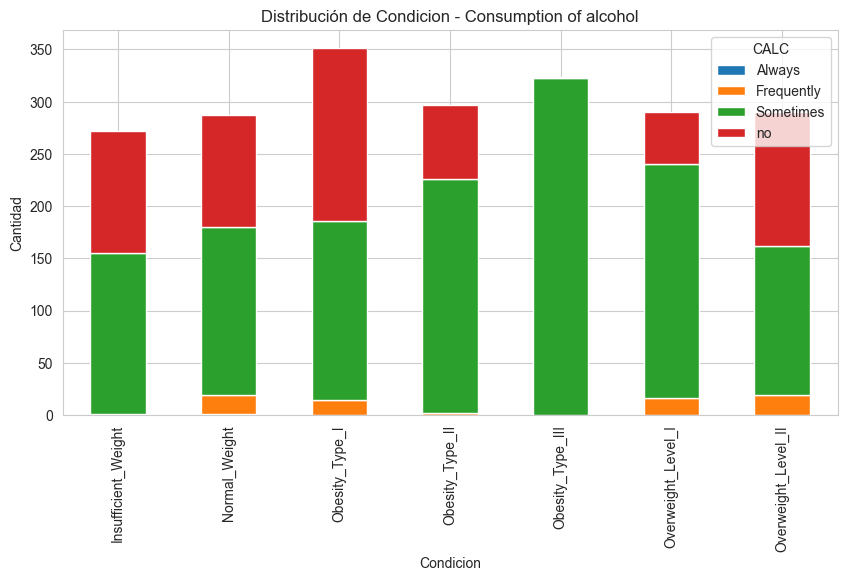

In [62]:
plot_obesidad(['NObeyesdad', 'CALC'])

In [63]:
df_clean = df_dirty.drop(columns=['Height','Weight','Age'])
df_clean

Gender family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE  \
0     Female                            yes   no   2.0  3.0  Sometimes    no   
1     Female                            yes   no   3.0  3.0  Sometimes   yes   
2       Male                            yes   no   2.0  3.0  Sometimes    no   
3       Male                             no   no   3.0  3.0  Sometimes    no   
4       Male                             no   no   2.0  1.0  Sometimes    no   
...      ...                            ...  ...   ...  ...        ...   ...   
2106  Female                            yes  yes   3.0  3.0  Sometimes    no   
2107  Female                            yes  yes   3.0  3.0  Sometimes    no   
2108  Female                            yes  yes   3.0  3.0  Sometimes    no   
2109  Female                            yes  yes   3.0  3.0  Sometimes    no   
2110  Female                            yes  yes   3.0  3.0  Sometimes    no   

      CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0      2.0   no  0.0  1.0          no  Public_Transportation   
1      3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2      2.0   no  2.0  1.0  Frequently  Public_Transportation   
3      2.0   no  2.0  0.0  Frequently                Walking   
4      2.0   no  0.0  0.0   Sometimes  Public_Transportation   
...    ...  ...  ...  ...         ...                    ...   
2106   2.0   no  2.0  1.0   Sometimes  Public_Transportation   
2107   2.0   no  1.0  1.0   Sometimes  Public_Transportation   
2108   2.0   no  1.0  1.0   Sometimes  Public_Transportation   
2109   3.0   no  1.0  1.0   Sometimes  Public_Transportation   
2110   3.0   no  1.0  1.0   Sometimes  Public_Transportation   

               NObeyesdad  
0           Normal_Weight  
1           Normal_Weight  
2           Normal_Weight  
3      Overweight_Level_I  
4     Overweight_Level_II  
...                   ...  
2106     Obesity_Type_III  
2107     Obesity_Type_III  
2108     Obesity_Type_III  
2109     Obesity_Type_III  
2110     Obesity_Type_III  

[2111 rows x 14 columns]

In [64]:
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   family_history_with_overweight  2111 non-null   object 
 2   FAVC                            2111 non-null   object 
 3   FCVC                            2111 non-null   float64
 4   NCP                             2111 non-null   float64
 5   CAEC                            2111 non-null   object 
 6   SMOKE                           2111 non-null   object 
 7   CH2O                            2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   FAF                             2111 non-null   float64
 10  TUE                             2111 non-null   float64
 11  CALC                            2111 non-null   object 
 12  MTRANS                          21

None

In [65]:
# Preprocesamiento de datos
label_encoders = {}

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df_clean[col] = df_clean[col].astype("category")
        df_clean[col] = label_encoder.fit_transform(df_clean[col])
        label_encoders[col] = label_encoder

display(df_clean)
display(df_clean.info())

Gender  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0          0                               1     0   2.0  3.0     2      0   
1          0                               1     0   3.0  3.0     2      1   
2          1                               1     0   2.0  3.0     2      0   
3          1                               0     0   3.0  3.0     2      0   
4          1                               0     0   2.0  1.0     2      0   
...      ...                             ...   ...   ...  ...   ...    ...   
2106       0                               1     1   3.0  3.0     2      0   
2107       0                               1     1   3.0  3.0     2      0   
2108       0                               1     1   3.0  3.0     2      0   
2109       0                               1     1   3.0  3.0     2      0   
2110       0                               1     1   3.0  3.0     2      0   

      CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0      2.0    0  0.0  1.0     3       3           1  
1      3.0    1  3.0  0.0     2       3           1  
2      2.0    0  2.0  1.0     1       3           1  
3      2.0    0  2.0  0.0     1       4           5  
4      2.0    0  0.0  0.0     2       3           6  
...    ...  ...  ...  ...   ...     ...         ...  
2106   2.0    0  2.0  1.0     2       3           4  
2107   2.0    0  1.0  1.0     2       3           4  
2108   2.0    0  1.0  1.0     2       3           4  
2109   3.0    0  1.0  1.0     2       3           4  
2110   3.0    0  1.0  1.0     2       3           4  

[2111 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   family_history_with_overweight  2111 non-null   int32  
 2   FAVC                            2111 non-null   int32  
 3   FCVC                            2111 non-null   float64
 4   NCP                             2111 non-null   float64
 5   CAEC                            2111 non-null   int32  
 6   SMOKE                           2111 non-null   int32  
 7   CH2O                            2111 non-null   float64
 8   SCC                             2111 non-null   int32  
 9   FAF                             2111 non-null   float64
 10  TUE                             2111 non-null   float64
 11  CALC                            2111 non-null   int32  
 12  MTRANS                          21

None

In [66]:
def target_decoder(label):
    le = label_encoders['NObeyesdad']
    display(f"************NObeyesdad*********")
    display(f"nombre de etiqueta{list(set(le.inverse_transform([label])))} --- Etiqueta: {label}")
target_decoder(0)

'************NObeyesdad*********'

"nombre de etiqueta['Insufficient_Weight'] --- Etiqueta: 0"

In [67]:

for col in df_clean.columns:
    array = pd.unique(df_clean[col])
    if df_clean[col].dtype == 'int32':
        le = label_encoders[col]
        display(f"************{col} - {decode_question(col)}*********")
        for i in array:
            display(f"nombre de etiqueta{list(set(le.inverse_transform([i])))} --- Etiqueta: {i}")


'************Gender - Gender*********'

"nombre de etiqueta['Female'] --- Etiqueta: 0"

"nombre de etiqueta['Male'] --- Etiqueta: 1"

'************family_history_with_overweight - family history with overweight*********'

"nombre de etiqueta['yes'] --- Etiqueta: 1"

"nombre de etiqueta['no'] --- Etiqueta: 0"

'************FAVC - Frequent consumption of high caloric food*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************CAEC - Consumption of food between meals*********'

"nombre de etiqueta['Sometimes'] --- Etiqueta: 2"

"nombre de etiqueta['Frequently'] --- Etiqueta: 1"

"nombre de etiqueta['Always'] --- Etiqueta: 0"

"nombre de etiqueta['no'] --- Etiqueta: 3"

'************SMOKE - Smoke*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************SCC - Calories consumption monitoring*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************CALC - Consumption of alcohol*********'

"nombre de etiqueta['no'] --- Etiqueta: 3"

"nombre de etiqueta['Sometimes'] --- Etiqueta: 2"

"nombre de etiqueta['Frequently'] --- Etiqueta: 1"

"nombre de etiqueta['Always'] --- Etiqueta: 0"

'************MTRANS - Transportation used*********'

"nombre de etiqueta['Public_Transportation'] --- Etiqueta: 3"

"nombre de etiqueta['Walking'] --- Etiqueta: 4"

"nombre de etiqueta['Automobile'] --- Etiqueta: 0"

"nombre de etiqueta['Motorbike'] --- Etiqueta: 2"

"nombre de etiqueta['Bike'] --- Etiqueta: 1"

'************NObeyesdad - Condicion*********'

"nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"

"nombre de etiqueta['Overweight_Level_I'] --- Etiqueta: 5"

"nombre de etiqueta['Overweight_Level_II'] --- Etiqueta: 6"

"nombre de etiqueta['Obesity_Type_I'] --- Etiqueta: 2"

"nombre de etiqueta['Insufficient_Weight'] --- Etiqueta: 0"

"nombre de etiqueta['Obesity_Type_II'] --- Etiqueta: 3"

"nombre de etiqueta['Obesity_Type_III'] --- Etiqueta: 4"

In [68]:
df_clean

Gender  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0          0                               1     0   2.0  3.0     2      0   
1          0                               1     0   3.0  3.0     2      1   
2          1                               1     0   2.0  3.0     2      0   
3          1                               0     0   3.0  3.0     2      0   
4          1                               0     0   2.0  1.0     2      0   
...      ...                             ...   ...   ...  ...   ...    ...   
2106       0                               1     1   3.0  3.0     2      0   
2107       0                               1     1   3.0  3.0     2      0   
2108       0                               1     1   3.0  3.0     2      0   
2109       0                               1     1   3.0  3.0     2      0   
2110       0                               1     1   3.0  3.0     2      0   

      CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0      2.0    0  0.0  1.0     3       3           1  
1      3.0    1  3.0  0.0     2       3           1  
2      2.0    0  2.0  1.0     1       3           1  
3      2.0    0  2.0  0.0     1       4           5  
4      2.0    0  0.0  0.0     2       3           6  
...    ...  ...  ...  ...   ...     ...         ...  
2106   2.0    0  2.0  1.0     2       3           4  
2107   2.0    0  1.0  1.0     2       3           4  
2108   2.0    0  1.0  1.0     2       3           4  
2109   3.0    0  1.0  1.0     2       3           4  
2110   3.0    0  1.0  1.0     2       3           4  

[2111 rows x 14 columns]

In [69]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

In [70]:
# scaler = StandardScaler()
# num_features = ['FCVC','NCP','CH2O','FAF','TUE']
# scaler.fit(X[num_features])
# X[num_features] = scaler.transform(X[num_features])
# X

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   family_history_with_overweight  2111 non-null   int32  
 2   FAVC                            2111 non-null   int32  
 3   FCVC                            2111 non-null   float64
 4   NCP                             2111 non-null   float64
 5   CAEC                            2111 non-null   int32  
 6   SMOKE                           2111 non-null   int32  
 7   CH2O                            2111 non-null   float64
 8   SCC                             2111 non-null   int32  
 9   FAF                             2111 non-null   float64
 10  TUE                             2111 non-null   float64
 11  CALC                            2111 non-null   int32  
 12  MTRANS                          21

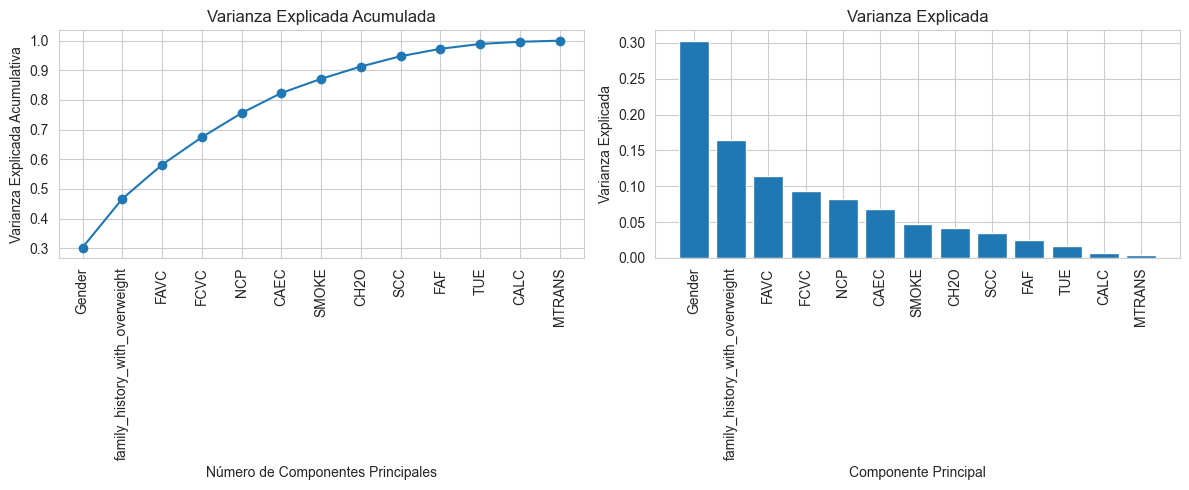

In [72]:
from sklearn.decomposition import PCA
# Inicializa el modelo PCA
pca = PCA()

# Ajusta el modelo PCA a tus datos
pca.fit(X)

# Obtiene la varianza explicada acumulativa
varianza_acumulativa = np.cumsum(pca.explained_variance_ratio_)

# Obtiene las componentes principales
componentes_principales = pca.components_

# Obtiene la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_


plt.figure(figsize=(12, 5))  # Establece el tamaño de la figura

plt.subplot(1, 2, 1)  # Subplot izquierdo
# Gráfica la varianza explicada acumulativa
plt.plot(range(1, len(varianza_acumulativa) + 1), varianza_acumulativa, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.xticks(range(1, len(varianza_acumulativa) + 1), X.columns, rotation=90)

plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.title('Varianza Explicada Acumulada')

# Gráfica de varianza explicada
plt.subplot(1, 2, 2)  # Subplot derecho
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.xticks(range(1, len(varianza_explicada) + 1), X.columns, rotation=90)
plt.ylabel('Varianza Explicada')
plt.grid(True)
plt.title('Varianza Explicada')

plt.tight_layout() 



plt.show()

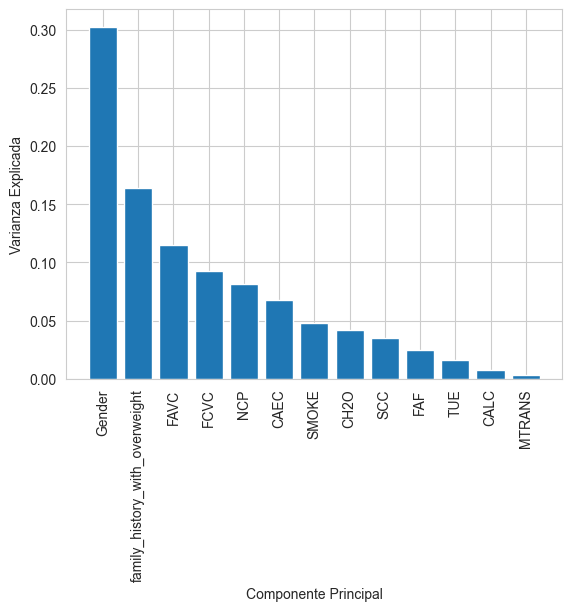

In [73]:
# Obtiene las componentes principales
componentes_principales = pca.components_

# Obtiene la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Gráfica la varianza explicada por cada componente
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xlabel('Componente Principal')
plt.xticks(range(1, len(varianza_explicada) + 1), X.columns, rotation=90)
plt.ylabel('Varianza Explicada')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split,GridSearchCV
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

display(X_train.shape)
display(X_test.shape)

(1688, 13)

(423, 13)

In [75]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled

In [76]:
results={}

algoritmos = {'SVC': SVC(random_state=42)
            ,'XGB': XGBClassifier(random_state=42)
            ,'RF': RandomForestClassifier(random_state=42)}

param_grid = {
    'SVC': {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': ['auto', 'scale'],
        'kernel': ['rbf', 'linear', 'poly'],
    },
    'XGB': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 4, 5, 6 ,7],
        'learning_rate': [0.001,0.01, 0.1, 0.2, 0.3],
        # 'min_child_weight': [1, 2, 3],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        # 'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'RF': {
        'n_estimators': [100, 200, 300, 400, 500],
        'min_samples_leaf': [1, 2, 4],
    },
}


for algorithm, params in param_grid.items():
    grid_search = GridSearchCV(estimator=algoritmos[algorithm], param_grid=params, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[algorithm] = {
        'best_params': best_params,
        'accuracy': accuracy
    }

KeyboardInterrupt: 

In [ ]:
print("=============================================")
print("Resultados para SVC:")
print(results['SVC'])
print("=============================================")
print("Resultados para XGBoost:")
print(results['XGB'])
print("=============================================")
print("Resultados para Random Forest:")
print(results['RF'])

Resultados para SVC:
{'best_params': {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, 'accuracy': 0.7210401891252955}
Resultados para XGBoost:
{'best_params': {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, 'accuracy': 0.7375886524822695}
Resultados para Random Forest:
{'best_params': {'max_depth': None, 'n_estimators': 300}, 'accuracy': 0.7281323877068558}


In [ ]:
testk = df_clean.drop('NObeyesdad', axis=1)
display(testk.columns)
lista_atributos = []
for labelss in testk.columns:
    lista_atributos.append((decode_question(labelss)))
print(lista_atributos)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

['Gender', 'family history with overweight', 'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices', 'Consumption of alcohol', 'Transportation used']


In [ ]:
algoritmos = {'SVC': SVC(C=10, gamma='auto',  kernel='rbf', random_state=42, probability=True)
            ,'XGB': XGBClassifier(n_estimators=300,max_depth=7,learning_rate=0.2, random_state=42)
            ,'RF': RandomForestClassifier(n_estimators=300,max_depth=None, random_state=42)}



def algoritmo_fit(nombre_algoritmo,x_trn,y_trn):
    algoritmo_fit = algoritmos[nombre_algoritmo].fit(x_trn, y_trn)
    if(nombre_algoritmo == 'XGB'):
        xgb.plot_importance(algoritmos['XGB'],ax=plt.gca())
        # plt.xticks(range(len(x_trn)), x_trn.columns, rotation=45)

        # tree = xgb.to_graphviz(algoritmos['XGB'], num_trees=1, rankdir='UD')
        # tree.view()
    return algoritmo_fit

def algoritmo_predict(nombre_algoritmo,x_tst):
    return algoritmos[nombre_algoritmo].predict(x_tst)

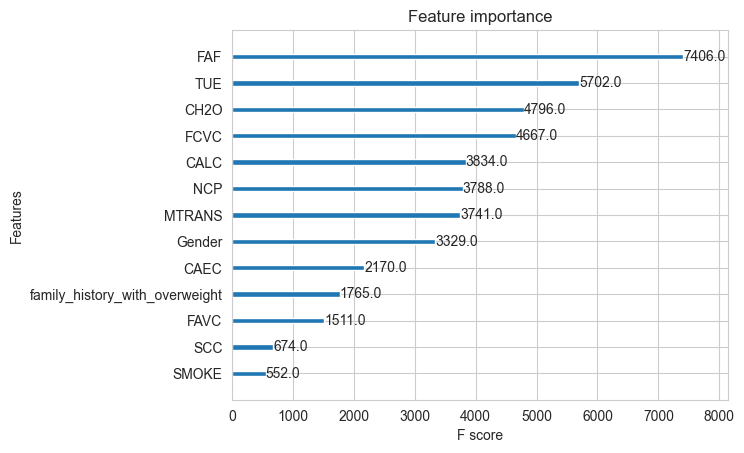

In [ ]:
# algoritmo_fit('LOGR',X_train,y_train)
svc_fit = algoritmo_fit('SVC',X_train,y_train)
xgb_fit = algoritmo_fit('XGB',X_train,y_train)
rf_fit = algoritmo_fit('RF',X_train,y_train)


# predictions_LOGR = algoritmo_predict('LOGR',X_test)
predictions_SVC = algoritmo_predict('SVC',X_test)
predictions_XGB = algoritmo_predict('XGB',X_test)
predictions_RF = algoritmo_predict('RF',X_test)

In [ ]:
print(decode_question('FAF'),'---',decode_question('TUE'),'---',decode_question('CH2O'),"---",decode_question('NCP'),"---",decode_question('FCVC'))
print(decode_question('FAVC'),' ',decode_question('SCC'),' ',decode_question('SMOKE'))

Physical activity frequency --- Time using technology devices --- Consumption of water daily --- Number of main meals --- Frequency of consumption of vegetables
Frequent consumption of high caloric food   Calories consumption monitoring   Smoke


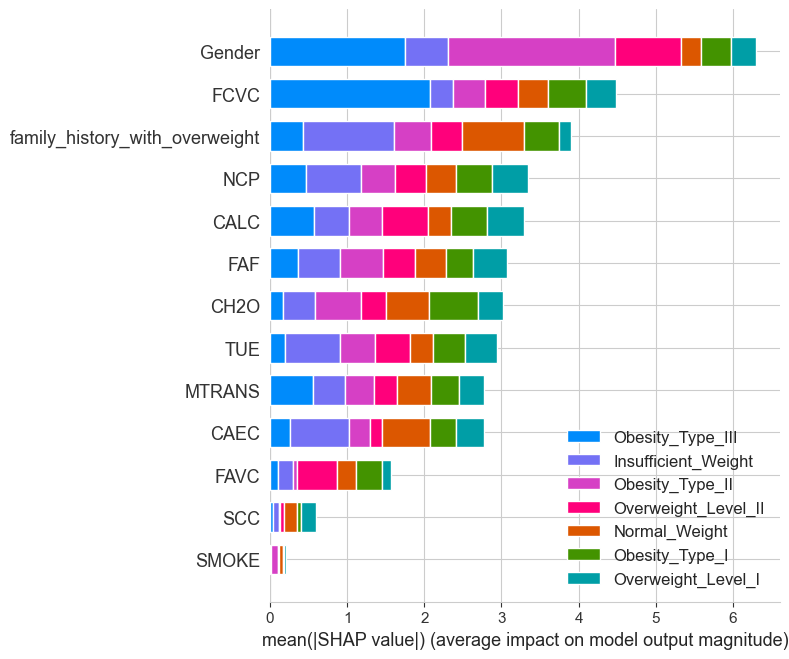

In [ ]:
colores_personalizados = ['blue', 'green', 'red', 'purple', 'pink', 'yellow', 'black']  # Puedes agregar más colores si es necesario

# Crear un explainer usando el modelo entrenado
explainer = shap.Explainer(xgb_fit)

# Calcular los SHAP values para un conjunto de datos (puedes usar X_test)
shap_values = explainer.shap_values(X_test)

clases = ['Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']
# Visualizar los SHAP values para una instancia particular
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

shap.summary_plot(shap_values, X_test, class_names=clases)

### Resultado Aporte de cada atributo a la prediccion individual de cada variable objetivo.

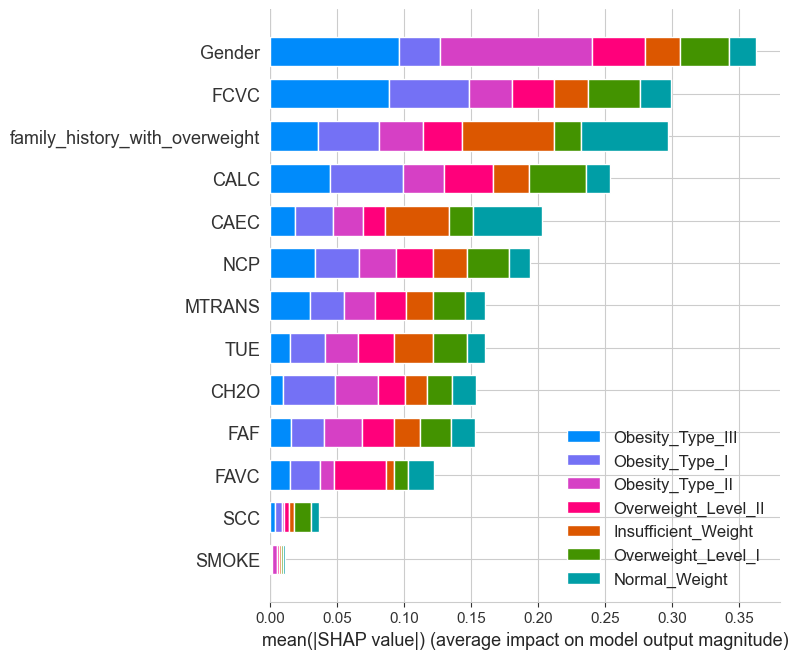

In [ ]:

# Crear un explainer usando el modelo entrenado
explainer_rf = shap.Explainer(rf_fit)

# Calcular los SHAP values para un conjunto de datos (puedes usar X_test)
shap_values_rf = explainer_rf.shap_values(X_test)

clases = ['Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']
# Visualizar los SHAP values para una instancia particular
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

shap.summary_plot(shap_values_rf, X_test, class_names=clases)

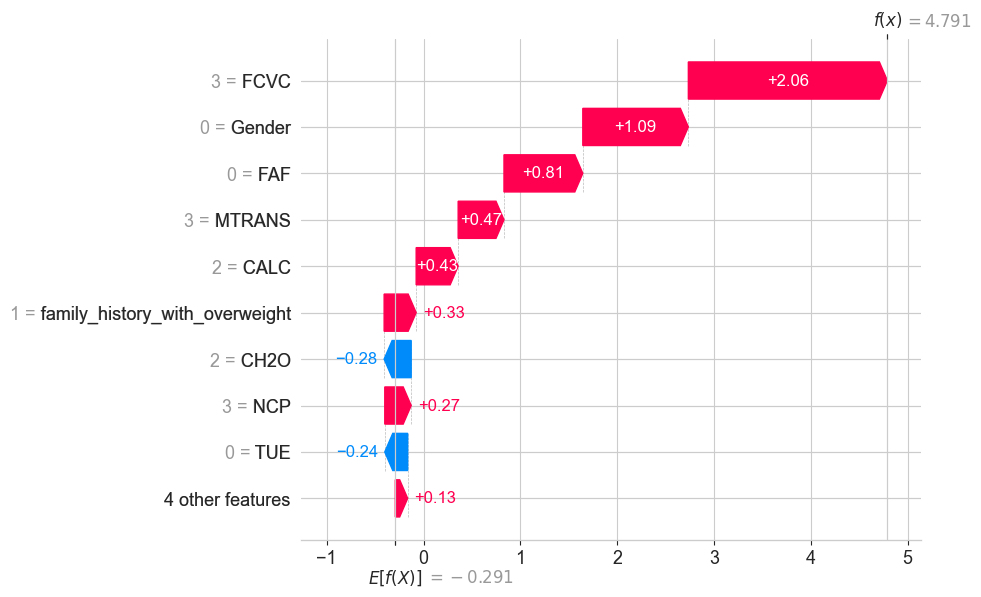

In [ ]:
################# OBESITY 3 ##################################
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

row = 14
shap.waterfall_plot(shap.Explanation(values=shap_values[4][row], 
                    base_values=explainer.expected_value[4], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))

In [ ]:
X_test.iloc[14]
y_test.iloc[14]
#### F(x): la prediccion --- etiqueta
#### E[F(x)]: el valor esperado ---- etiqueta---promedio(?)

#### los negativos significan que no contribuyo a esta clasificacion en particular, sino que contribuyo a otra...cual(?) no se sabe....
#### shap values, buscar como interpretar el negativo.... en clasificacion multiclase.

4

In [ ]:
pd.DataFrame(predictions_XGB).iloc[14]

0    4
Name: 14, dtype: int64

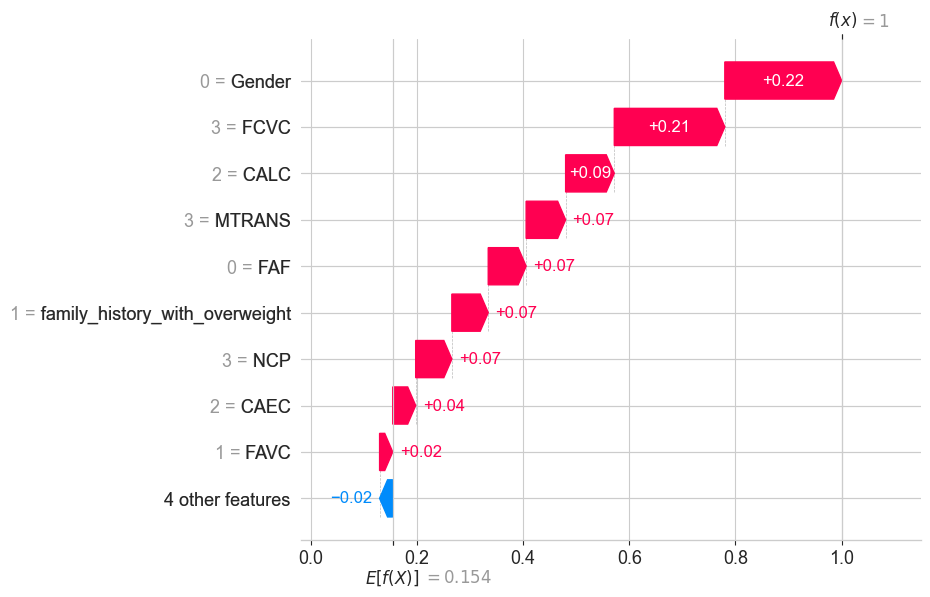

In [ ]:
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

shap.waterfall_plot(shap.Explanation(values=shap_values_rf[4][row], 
                    base_values=explainer_rf.expected_value[4], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))

In [ ]:
pd.DataFrame(predictions_RF).iloc[14]

0    4
Name: 14, dtype: int32

---
---

In [ ]:
pd.DataFrame(predictions_XGB).iloc[13]

0    3
Name: 13, dtype: int64

In [ ]:
y_test.iloc[13]

3

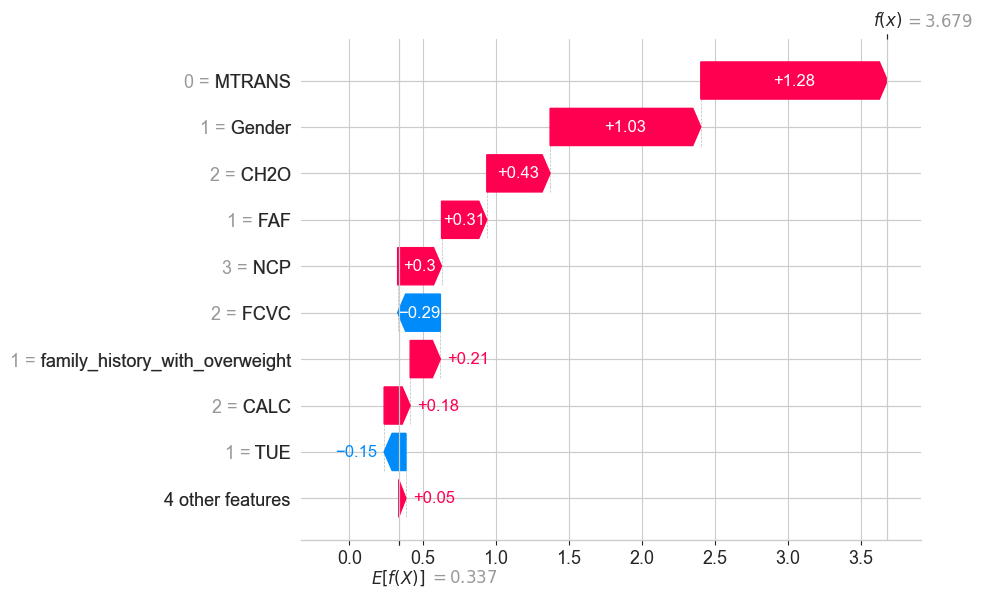

In [ ]:
################# OBESITY 2 ##################################
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

row = 13
shap.waterfall_plot(shap.Explanation(values=shap_values[3][row], 
                    base_values=explainer.expected_value[3], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))

In [ ]:
pd.DataFrame(predictions_RF).iloc[13]

0    3
Name: 13, dtype: int32

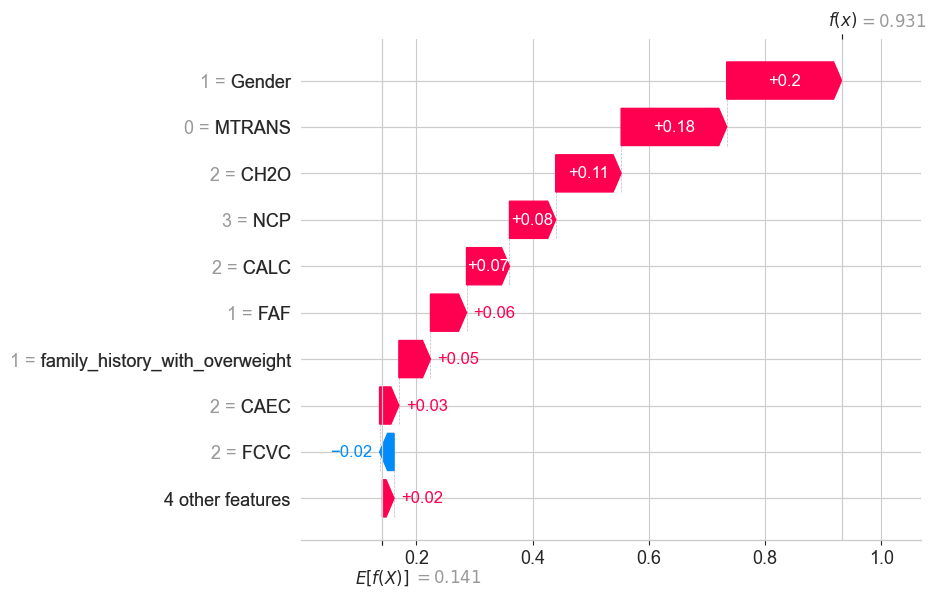

In [ ]:
################# OBESITY 2 ##################################
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

shap.waterfall_plot(shap.Explanation(values=shap_values_rf[3][row], 
                    base_values=explainer_rf.expected_value[3], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))


----
----

In [ ]:
y_test.iloc[20]

2

In [ ]:
pd.DataFrame(predictions_XGB).iloc[20]

0    2
Name: 20, dtype: int64

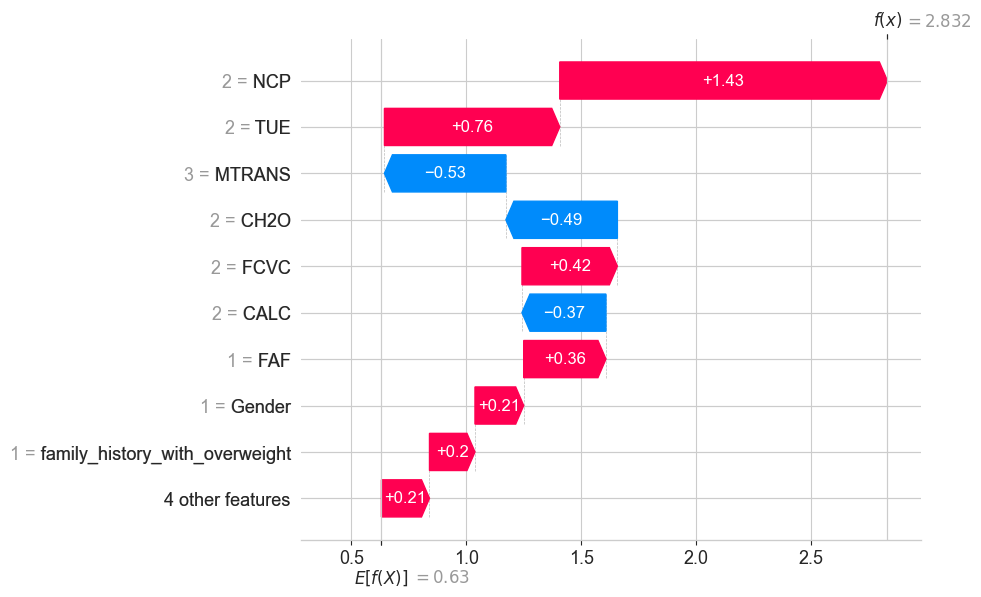

In [ ]:
################# OBESITY 1 ##################################
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

row = 20
shap.waterfall_plot(shap.Explanation(values=shap_values[2][row], 
                    base_values=explainer.expected_value[2], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))

In [ ]:
pd.DataFrame(predictions_RF).iloc[20]

0    2
Name: 20, dtype: int32

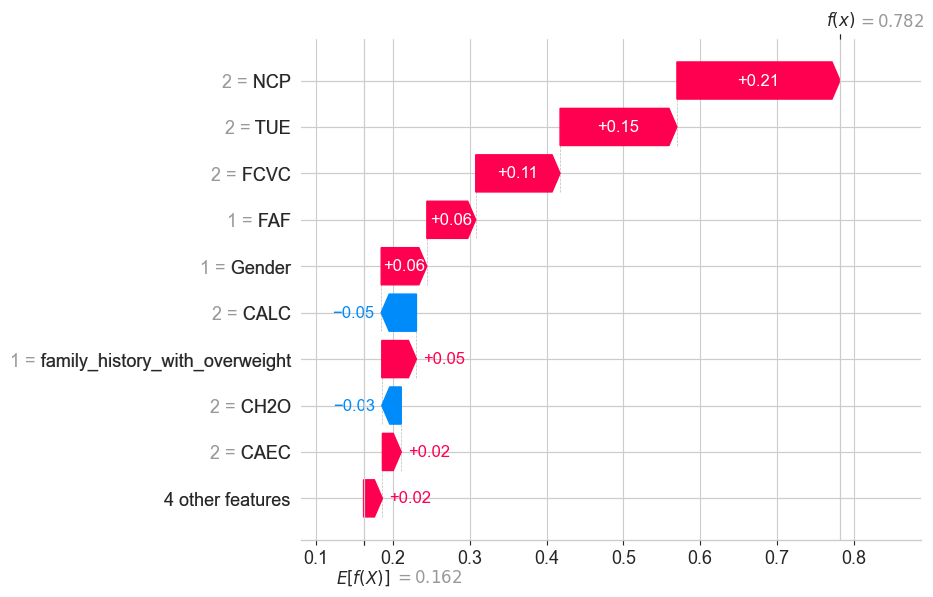

In [ ]:
################# OBESITY 1 ##################################
shap.initjs()  # Inicializa la visualización de SHAP (solo necesario en notebooks)

row = 20

shap.waterfall_plot(shap.Explanation(values=shap_values_rf[2][row], 
                    base_values=explainer_rf.expected_value[2], data=X_test.iloc[row],  
                    feature_names=X_test.columns.tolist()))
# '************NObeyesdad - Condicion*********'
# "nombre de etiqueta['Insufficient_Weight'] --- Etiqueta: 0"
# "nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"
# "nombre de etiqueta['Obesity_Type_I'] --- Etiqueta: 2"
# "nombre de etiqueta['Obesity_Type_II'] --- Etiqueta: 3"
# "nombre de etiqueta['Obesity_Type_III'] --- Etiqueta: 4"
# "nombre de etiqueta['Overweight_Level_I'] --- Etiqueta: 5"
# "nombre de etiqueta['Overweight_Level_II'] --- Etiqueta: 6"

In [ ]:
pd.DataFrame(predictions_SVC).iloc[20]

0    6
Name: 20, dtype: int32

In [ ]:
for col in df_clean.columns:
    array = pd.unique(df_clean[col])
    if df_clean[col].dtype == 'int32':
        le = label_encoders[col]
        display(f"************{col} - {decode_question(col)}*********")
        for i in array:
            display(f"nombre de etiqueta{list(set(le.inverse_transform([i])))} --- Etiqueta: {i}")


'************Gender - Gender*********'

"nombre de etiqueta['Female'] --- Etiqueta: 0"

"nombre de etiqueta['Male'] --- Etiqueta: 1"

'************family_history_with_overweight - family history with overweight*********'

"nombre de etiqueta['yes'] --- Etiqueta: 1"

"nombre de etiqueta['no'] --- Etiqueta: 0"

'************FAVC - Frequent consumption of high caloric food*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************CAEC - Consumption of food between meals*********'

"nombre de etiqueta['Sometimes'] --- Etiqueta: 2"

"nombre de etiqueta['Frequently'] --- Etiqueta: 1"

"nombre de etiqueta['Always'] --- Etiqueta: 0"

"nombre de etiqueta['no'] --- Etiqueta: 3"

'************SMOKE - Smoke*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************SCC - Calories consumption monitoring*********'

"nombre de etiqueta['no'] --- Etiqueta: 0"

"nombre de etiqueta['yes'] --- Etiqueta: 1"

'************CALC - Consumption of alcohol*********'

"nombre de etiqueta['no'] --- Etiqueta: 3"

"nombre de etiqueta['Sometimes'] --- Etiqueta: 2"

"nombre de etiqueta['Frequently'] --- Etiqueta: 1"

"nombre de etiqueta['Always'] --- Etiqueta: 0"

'************MTRANS - Transportation used*********'

"nombre de etiqueta['Public_Transportation'] --- Etiqueta: 3"

"nombre de etiqueta['Walking'] --- Etiqueta: 4"

"nombre de etiqueta['Automobile'] --- Etiqueta: 0"

"nombre de etiqueta['Motorbike'] --- Etiqueta: 2"

"nombre de etiqueta['Bike'] --- Etiqueta: 1"

'************NObeyesdad - Condicion*********'

"nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"

"nombre de etiqueta['Overweight_Level_I'] --- Etiqueta: 5"

"nombre de etiqueta['Overweight_Level_II'] --- Etiqueta: 6"

"nombre de etiqueta['Obesity_Type_I'] --- Etiqueta: 2"

"nombre de etiqueta['Insufficient_Weight'] --- Etiqueta: 0"

"nombre de etiqueta['Obesity_Type_II'] --- Etiqueta: 3"

"nombre de etiqueta['Obesity_Type_III'] --- Etiqueta: 4"

In [ ]:
### Prueba personal

array_test = {'Gender':['1'],
#              'Age':[34],
              'family_history_with_overweight':['1'],
              'FAVC': ['1'],
              'FCVC': [2],
              'NCP': [3],
              'CAEC':['0'],
              'SMOKE': ['0'],
              'CH2O': [1],
              'SCC':['0'],
              'FAF': [3],
              'TUE': [2],
              'CALC': ['3'],
              'MTRANS':['0']
}

mytest = pd.DataFrame(array_test)
mytest = mytest.astype('int32')

display(mytest)
display(mytest.dtypes)


Gender  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0       1                               1     1     2    3     0      0     1   

   SCC  FAF  TUE  CALC  MTRANS  
0    0    3    2     3       0

Gender                            int32
family_history_with_overweight    int32
FAVC                              int32
FCVC                              int32
NCP                               int32
CAEC                              int32
SMOKE                             int32
CH2O                              int32
SCC                               int32
FAF                               int32
TUE                               int32
CALC                              int32
MTRANS                            int32
dtype: object

In [ ]:
target_decoder(int(svc_fit.predict(mytest)))

'************NObeyesdad*********'

"nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"

In [ ]:
target_decoder(int(xgb_fit.predict(mytest)))

'************NObeyesdad*********'

"nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"

In [ ]:
target_decoder(int(rf_fit.predict(mytest)))

'************NObeyesdad*********'

"nombre de etiqueta['Normal_Weight'] --- Etiqueta: 1"

In [ ]:
accuracy_SVC = accuracy_score(y_test, predictions_SVC)
accuracy_XGB = accuracy_score(y_test, predictions_XGB)
accuracy_RF = accuracy_score(y_test, predictions_RF)

print(f'Accuracy SVC: {accuracy_SVC}\n'
       f'Accuracy XGB: {accuracy_XGB}\n'
       f'Accuracy RF: {accuracy_RF}\n')

Accuracy SVC: 0.7210401891252955
Accuracy XGB: 0.7375886524822695
Accuracy RF: 0.7281323877068558



In [ ]:
def clasi_confu_report(y_tst,y_predict,x_tst,nombre_algoritmo):
    target_names = ['Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']
    print(classification_report(y_tst, y_predict, target_names=target_names))

    ConfusionMatrixDisplay.from_estimator(
        algoritmos[nombre_algoritmo], x_tst, y_tst, display_labels=target_names, xticks_rotation="vertical"
    )
    plt.tight_layout()
    plt.show()

*************** SVC ***************
                     precision    recall  f1-score   support

Insufficient_Weight       0.68      0.86      0.76        56
      Normal_Weight       0.69      0.53      0.60        62
     Obesity_Type_I       0.72      0.71      0.71        78
    Obesity_Type_II       0.67      0.95      0.79        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.61      0.50      0.55        56
Overweight_Level_II       0.66      0.46      0.54        50

           accuracy                           0.72       423
          macro avg       0.71      0.71      0.70       423
       weighted avg       0.72      0.72      0.71       423



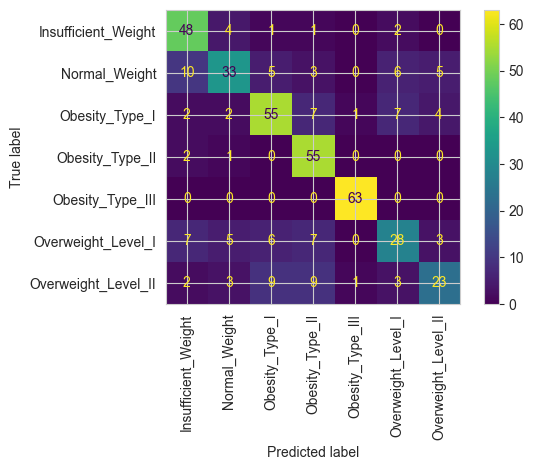

*************** XGB ***************
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.80      0.75        56
      Normal_Weight       0.72      0.61      0.66        62
     Obesity_Type_I       0.79      0.68      0.73        78
    Obesity_Type_II       0.72      0.93      0.81        58
   Obesity_Type_III       0.95      0.98      0.97        63
 Overweight_Level_I       0.58      0.57      0.58        56
Overweight_Level_II       0.64      0.56      0.60        50

           accuracy                           0.74       423
          macro avg       0.73      0.73      0.73       423
       weighted avg       0.74      0.74      0.73       423



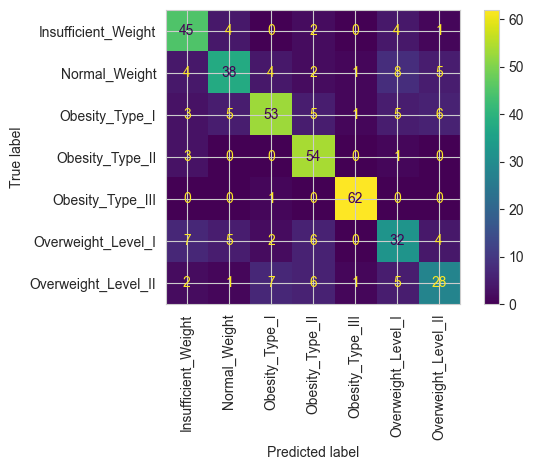

*************** RF ***************
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.82      0.75        56
      Normal_Weight       0.71      0.56      0.63        62
     Obesity_Type_I       0.76      0.67      0.71        78
    Obesity_Type_II       0.71      0.93      0.81        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.61      0.54      0.57        56
Overweight_Level_II       0.56      0.56      0.56        50

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.72       423
       weighted avg       0.73      0.73      0.72       423



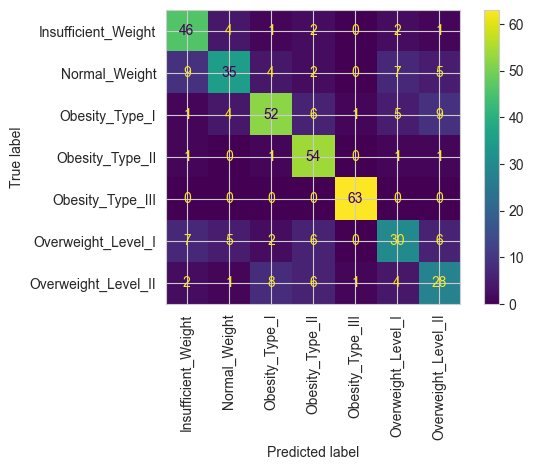

In [102]:
print('*************** SVC ***************')
clasi_confu_report(y_test,predictions_SVC,X_test,'SVC')

print('*************** XGB ***************')
clasi_confu_report(y_test,predictions_XGB,X_test,'XGB')

print('*************** RF ***************')
clasi_confu_report(y_test,predictions_RF,X_test,'RF')


----
# Autor del Notebook: Jorge Enrique Romero Perez.
----